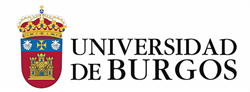
# Práctica 4 - Algoritmos Voraces
### Algoritmia - Grado en Ingeniería Informática - Universidad de Burgos

Es el año 2200 y la humanidad se prepara para dar el gran salto interplanetario. Los colonizadores del exoplaneta *Teegarden b* están listos para asentar la vida en un mundo nuevo y desconocido. La misión debe partir con tecnología básica embarcada, ya que, debido al tiempo requerido para establecer comunicaciones con la Tierra -del orden de años-, los pioneros deberán ser completamente autosuficientes.

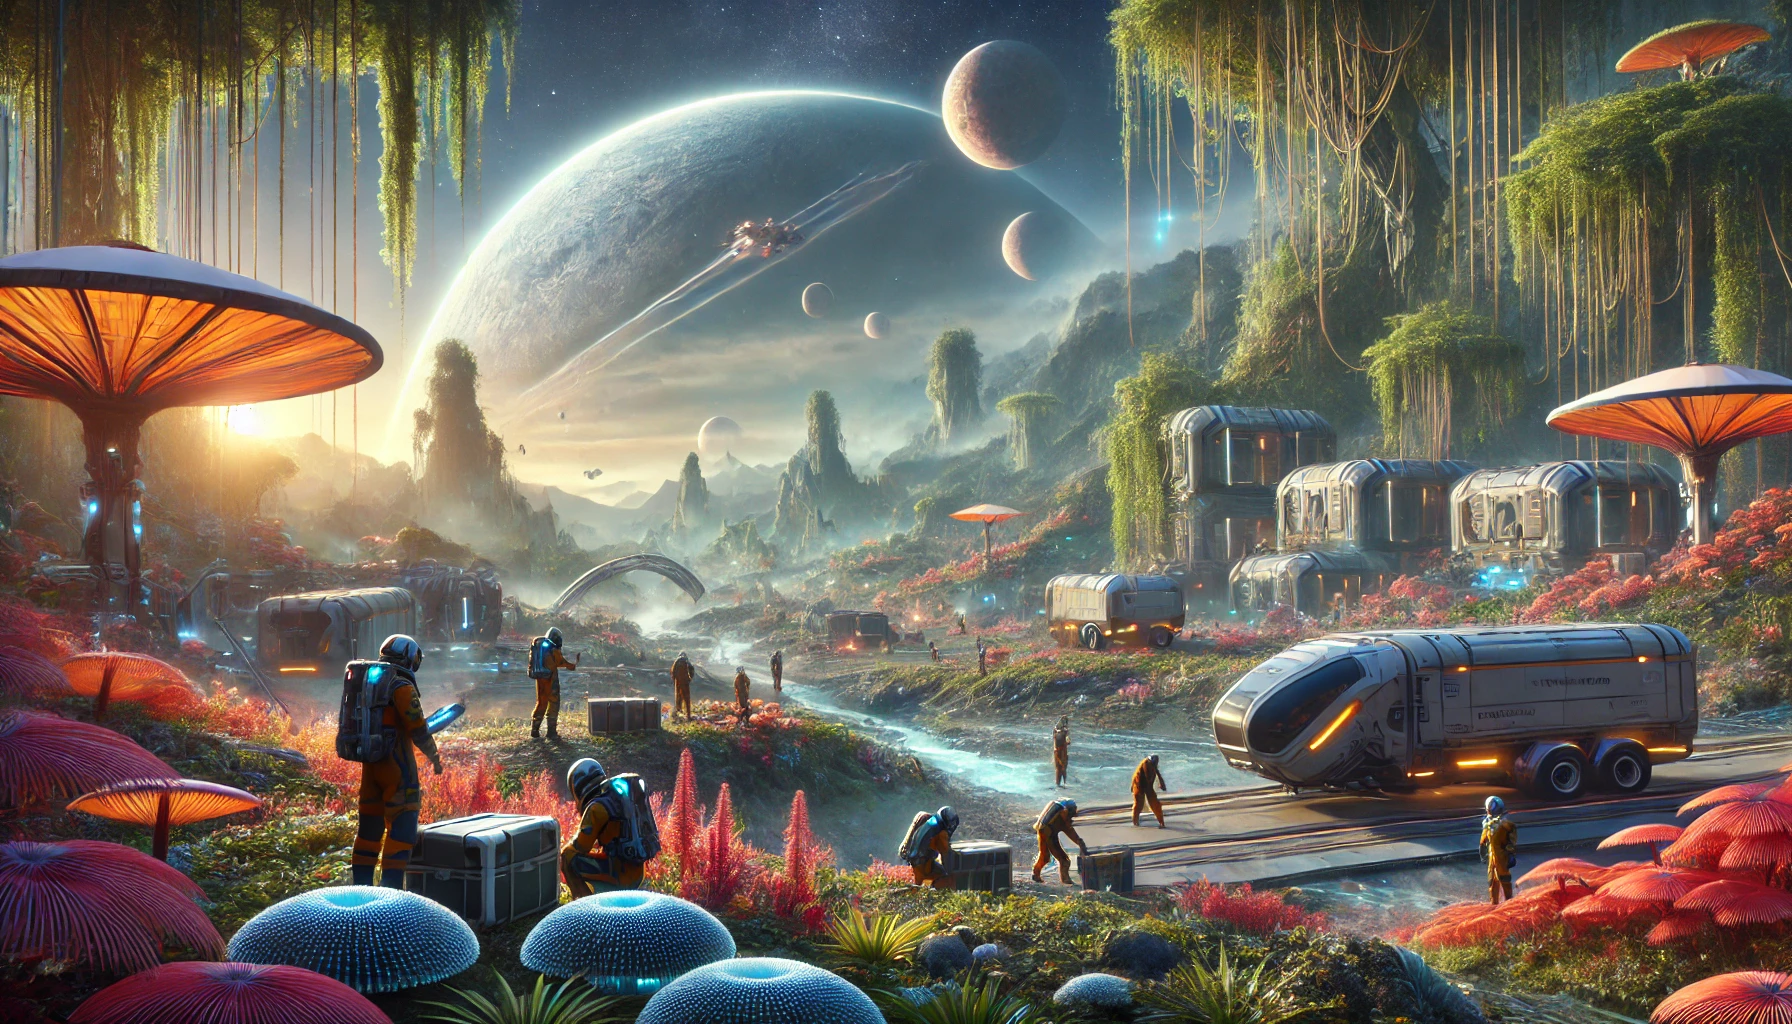

Entre las herramientas con las que debe equiparse la expedición, se encuentran los sistemas de gestión de recursos soportados por medios computacionales. En particular, deberá contar con algoritmos para organizar de manera eficiente los diferentes sectores del nuevo asentamiento. Esta eficiencia puede marcar la diferencia entre el éxito y el fracaso en la colonización y, por lo tanto, condicionar el futuro de la especie humana.

### Problemas a resolver
En este contexto, se plantean dos desafíos fundamentales para la gestión de la colonia:

1. **Construir la red básica de comunicación**  
   Los colonizadores construirán las instalaciones en distintas ubicaciones (sectores), atendiendo a su función o disponibilidad de recursos naturales del planeta. Una tarea primordial durante las primeras fases de colonización es conectar mediante vías de comunicación todos los sectores del asentamiento con el menor coste posible. Con el fin de simplificar el problema, asumiremos que los costes únicamente dependen de la distancia entre sectores. Por lo tanto, resolver este problema implica determinar qué conexiones entre sectores permiten mantener a la colonia intercomunicada de forma óptima (con menor distancia total de vías), dadas las posibles conexiones entre sectores y su distancia. 

2. **Determinar las rutas optimas de exploración y distribución**  
   Una vez establecido el asentamiento, es vital organizar las rutas que permitan explorar y distribuir recursos en la colonia. A partir de un sector base (por ejemplo, el módulo central), se requiere calcular las distancias mínimas hacia todos los demás sectores y reconstruir la ruta óptima hacia cualquier destino.

Los alumnos deberán estudiar y proponer métodos eficientes para resolver ambos problemas. Ya se proporciona una clase básica para gestionar la información (grafo) del asentamiento, _AsentamientoExoplaneta_.

Es importante notar que ambos problemas no tienen por qué resolverse secuencialmente ni sobre el mismo grafo. Los métodos implementados deben permitir resolver los problemas sobre cualquier objeto _AsentamientoExoplaneta_.

### Entregables

* Completar sobre este mismo notebook las funciones indicadas con _pass_, con el fin de __resolver los problemas planteados. (6 puntos de 10)__
* Responder a las __preguntas planteadas__ en la siguiente celda, sobre el mismo notebook __(4 puntos de 10)__
  
Entregar el archivo resultate con el siguiente formato:

    <primer-apellido>_<segundo-apellido>_P04.ipynb

Por ejemplo, _seto\_rey\_P04.ipynb_

### Cuestiones
Responder a las siguientes preguntas __una vez resuelta la implementación__.

Francisco J Arroyo: https://github.com/far0010/algoritmia

1. Analiza la complejidad temporal y espacial de las soluciones propuestas (2 puntos)

-Para la red básica tenemos una complejidad:
    El primer while tenemos O(n-1), ya que es el número de nodos mínimos a crear.
    Dentro del while el para encontrar el menor recorremos toda la red O(n) y luego sus conexiones, en el pero caso O(n-1), esto daría para este apartado un coste de O(n^2). Para verificar si está ya en la red, utilizamos otro for O(n) y la llamada a la función buscar_grupo, con un coste de O(2n), ya que hacemos dos llamadas.
    Así el coste sería O(n) del while x ( O(n^2)+ O(n)+ O(n)) = O(n^3)

    En cuanto a la complejidad espacial, tenemos dos listas, mired de n nodos y a aristas y red n-1 elementos.
    Tenmos 3 set, setO, setD y visitados, con tamaño máximo de n nodos visitados.
    Para la recursión entiendo que como máximo será de n elementos.
    Las variables auxiliares tamaño 1.
    Así, la complejidad espacial estará establecida por el mayo que será mired O(n+a)

-Para rutas de exploración:
    El primer bucle vuelta, recorre el mapa n-1, O(n-1), un primer bucle interno para las conexiones también n veces, y el siguiente bucle para determinar el elible según las conexiones de cada nodo n veces.
    Así el total de la complejidad será O(n) x (O(n) + O(n)) = O(n^2)
    La complejidad espacial viene determinada por: dos diccionarios distancias y prev de n-1 elementos y una lista de n conexiones por vector
    Las variables auxiliares de tamaño 1, así el total será el mayor O(n), aunque si todos los nodos están conectados con todos O(n^2)  
   
3. Describe qué posibles problemas podrían surgir al aplicar los métodos propuestos en la práctica. (1 punto)
    Para la resolución se han utilizado los algoritmos voraces, kruskal y dijistra. Creo que el mayor problema vendría dado por redes muy grandes ya que la complejidad los haría inviables.

    Entiendo que si el grafo fuera dirigido no valdrían, tal cual, pueder ser hallar una ruta de tráfico, con calles de un sentido u otro.

    También, entiendo que el orden de solicitud influye mucho, ya que al ser algoritmos voraces, escogen lo mejor en el momento, así que una ordenación diferente podría obtener resultados óptimos.

    La pregunta, que me planteo, es si un nodo no está conectad
   
5. Considerando tu experiencia personal, describe que aspectos te han resultado más complejos a la hora de abordar esta práctica y qué recursos has empleado para afrontarlos (1 punto)
    El primer paso fue realizar en papel el grafo y determinar qué tipo de algortimo era necesario para resolver cada caso, (kruskal y Dijistra)
    
    El principal problema ha sido en el algoritmo Kruskal, el evitar los ciclos. Encontré una solución inicial para los test que se planteaban bastante rápido con listas, pero al añadir una red más compleja no funcionaba.

    Como no quería replantear el problema entero, me costó bastante realizar la función buscar_grupo. En ella partiendo del concepto de pertenencia, lo que realizo es buscar a qué nodos está conectado el origen y a qué nodos el destino, así obtuve dos grupos. Ahí me surgió el problema de cómo hallar si estaban unos contenidos en otros. Si hubiera realizado un árbol, serían los que comparten raiz, pero cuando realizaba las uniones del árbol, me resultaba bastante complejo determinar quién era hijo de quién.

   Al final, al ser dos conjuntos, se reduce a saber si su intersección es vacío, y busqué la función setO.isdijunt(setD), que devuelve True si son disjuntos.


In [46]:
# Importar las bibliotecas necesarias

class AsentamientoExoplaneta:
    """
    La clase AsentamientoExoplaneta representa el mapa geoespacial de la colonia en el exoplaneta, basado en
    una representación de tipo grafo.
    Los métodos a implementar permiten:
      - Generar la red básica de comunicación entre sectores, conectando todos los sectores con el menor coste (distancia) total.
      - Calcular las rutas óptimas de exploración y distribución a partir de un sector base.
    
    Los detalles de los algoritmos a emplear y su implementación deben ser analizados y decididos por los alumnos.
    """
    
    def __init__(self):
        # Mapa: cada sector se asocia a una lista de conexiones (sector_vecino, coste)
        self.mapa = {}
        
    def agregar_sector(self, sector):
        """Agrega un sector al mapa si no existe aún."""
        if sector not in self.mapa:
            self.mapa[sector] = []
    
    def agregar_conexion(self, origen, destino, coste):
        """
        Agrega una conexión bidireccional entre dos sectores con el coste indicado.
        """
        self.agregar_sector(origen)
        self.agregar_sector(destino)
        self.mapa[origen].append((destino, coste))
        self.mapa[destino].append((origen, coste))
        
    def obtener_sectores(self):
        """Devuelve la lista de sectores del asentamiento."""
        return list(self.mapa.keys())
    
    def red_basica(self):
        """
        Construye la red básica de comunicación del asentamiento, conectando todos los sectores
        de forma que se minimice el coste total de las conexiones.
        
        Devuelve:
            - red: lista de conexiones en el formato (sector_origen, sector_destino, coste)
            - coste_total: coste total de la red.
        """
        min=99999 # inicializamos el mínimo a valor alto min bajo
        max=0
        total=0
        red=[]
        setO=set()
        setD=set()
        mired=self.mapa
        # el número de nodos siempre sera 1 menos del original
        while len(red) < len(mired)-1: # O(n-1)
            #recorremos mired para encontrar el menor
            for sector in mired: # O (n) según el numero de nodos.
                for n in range(len(mired[sector])): # O(n-1) según las conexiones por nodo
                    if (mired[sector][n][1])<min and (mired[sector][n][1])>=max:
                        origen=sector
                        destino=mired[sector][n][0]
                        min=mired[sector][n][1]
                        ele=n
            # comprobamos si hay bucle
            estaO, estaD, borrado = False, False, False
            for lista in red:
                # comparamos si el origen está ya en la lista
                if (origen==lista[0]) and (destino==lista[1]):
                    estaO=True
                # comparamos si el destino está ya en la lista
                if (origen==lista[1]) or (destino==lista[0]):
                    estaD=True
                # obtenemos los grupos de origen y destino para ver si hacen bucle, si tienen elementos en común, lo son:
                setO=set(self.busca_grupo(origen, red))
                setD=set(self.busca_grupo(destino, red))
                # si está como origen o destino lo borramos para no volverlo a coger o si es bucle (los sets no tienen elementos en común)
                if estaO or estaD or setO.isdisjoint(setD)==False:
                    del(mired[origen][ele])
                    borrado=True
                    min=99999
                    break
            # en el caso de que no estuviera ni fuera bucle lo añadimos a la lista
            if borrado==False:  
                red.append([origen, destino, min])
                # y lo borramos para no volverlo a tomar
                del(mired[origen][ele])
                max=min
                min=99999
                # sumamos el valor del arco
                total+=max  
        # devolvemos la red y el total
        return red, total

    def busca_grupo(self, dato, red, visitados=None):
        if visitados is None:
            # si es el inicio hago un set, que evita duplicidades
            visitados = set()  
        grupo = []
        # Añado el primero
        visitados.add(dato)
        # recorro la red.
        for ele in red:
            # si el origen es igual al dato y el destino no está en visitados lo añado
            if ele[0] == dato and ele[1] not in visitados:
                grupo.append(ele[1])
                # y añado recursivamente los que corresponden a destino
                grupo.extend(self.busca_grupo(ele[1], red, visitados))
            # si el destino es igual al dato y el origne no está en visitados lo añado y llamo recursivamente igual que antes.
            elif ele[1] == dato and ele[0] not in visitados:
                grupo.append(ele[0])
                grupo.extend(self.busca_grupo(ele[0], red, visitados))
        #devuelvo grupo
        return grupo
        
    
    def rutas_exploracion(self, origen):
        """
        Calcula las rutas óptimas de exploración y distribución desde el sector 'origen',
        determinando la distancia mínima a cada sector del asentamiento.
        
        Devuelve:
            - distancias: diccionario que mapea cada sector a la distancia mínima desde 'origen'
            - prev: diccionario que mapea cada sector a su sector predecesor en el camino óptimo.
        """
        distancias={}
        prev={}
        elegibles=[]
        # el primer elemento siempre es el mismo
        distancias[origen]=0
        prev[origen]=None 
        for vuelta in range(len(self.mapa)-1): #n-1
            # añado elementos elegibles más su distanccia si no están ya elegidos
            dist=distancias[origen]
            for sector in self.mapa[origen]: # n
                if sector[0] not in prev:
                    elegibles.append((origen, sector[0],sector[1]+dist))
            min=99999
            for n in range(len(elegibles)): # n
                #escogemos el menor del resto y que no haya sido ya elegido
                if (elegibles[n][2]<min) & (elegibles[n][1] not in prev):
                    min=elegibles[n][2]
                    origen_next=elegibles[n][1]
                    origen_prev=elegibles[n][0]
                    borro=n
            # añadimos el menor
            prev[origen_next]=origen_prev
            distancias[origen_next]=min
            # borro de elegibles el elemento añadido
            del(elegibles[borro])
            # intercambio el origen
            origen=origen_next
        return distancias, prev
                

# Tests

A continuación se proporcionan una estructura básica de test para comprobar la funcionalidad implementada

__IMPORTANTE: Los test proporcionados no son exhaustivos y se incluyen únicamente a modo de ejemplo.__ 

Superar estos tests no implica que la práctica está correctamente resuelta. Se recomienda que el alumno implemente tests adicionales con el fin de probar su implementación.

Un buen conjunto de casos de prueba debería incluir distintos tipos de grafos, de distintos tamaños, casos límite (grafos vacíos, con un solo nodo, cíclicos...) y validar los resultados esperados en los términos que apliquen (pesos, recorridos, etc)

In [49]:
import unittest

class TestAsentamientoExoplaneta(unittest.TestCase):
    def setUp(self):
        # Se construye un asentamiento de ejemplo con sectores conectados.
        self.asentamiento = AsentamientoExoplaneta()
        self.asentamiento.agregar_conexion("Sector1", "Sector2", 2)
        self.asentamiento.agregar_conexion("Sector1", "Sector3", 3)
        self.asentamiento.agregar_conexion("Sector2", "Sector3", 1)
        self.asentamiento.agregar_conexion("Sector2", "Sector4", 4)
        self.asentamiento.agregar_conexion("Sector3", "Sector4", 5)
        self.asentamiento.agregar_conexion("Sector3", "Sector5", 6)
        self.asentamiento.agregar_conexion("Sector4", "Sector5", 7)
    
    def test_red_basica(self):
        red, coste_total = self.asentamiento.red_basica()
        # Se espera que el coste total de la red básica sea 13, optimizando la conexión entre sectores.
        coste_esperado = 13
        self.assertEqual(coste_total, coste_esperado, "El coste total de la red básica debe ser 13")
        # La red debe tener n - 1 conexiones
        self.assertEqual(len(red), len(self.asentamiento.obtener_sectores()) - 1,
                         "La red básica debe tener n-1 conexiones")
    
    def test_rutas_exploracion(self):
        distancias, prev = self.asentamiento.rutas_exploracion("Sector1")
        # Se esperan las siguientes distancias mínimas desde "Sector1":
        distancias_esperadas = {"Sector1": 0, "Sector2": 2, "Sector3": 3, "Sector4": 6, "Sector5": 9}
        for sector, dist_esp in distancias_esperadas.items():
            self.assertEqual(distancias[sector], dist_esp, f"La distancia a {sector} debe ser {dist_esp}")
    
    def test_rutas_exploracion_path(self):
        # Función auxiliar para reconstruir la ruta óptima a partir del diccionario prev.
        def reconstruir_ruta(prev, destino):
            ruta = []
            while destino is not None:
                ruta.append(destino)
                destino = prev[destino]
            return ruta[::-1]

        distancias, prev = self.asentamiento.rutas_exploracion("Sector1")
        ruta_Sector5 = reconstruir_ruta(prev, "Sector5")
        # Dependiendo de la exploración, la ruta óptima podría ser:
        rutas_validas = [
            ["Sector1", "Sector2", "Sector3", "Sector5"],
            ["Sector1", "Sector3", "Sector5"]
        ]
        self.assertIn(ruta_Sector5, rutas_validas,
                      f"La ruta óptima a Sector5 debe ser una de {rutas_validas} y se obtuvo {ruta_Sector5}")

#mi test

class TestAsentamientoExoplaneta2(unittest.TestCase):
    def setUp(self):
        # Se construye un asentamiento de ejemplo con sectores conectados.
        self.asentamiento2 = AsentamientoExoplaneta()
        self.asentamiento2.agregar_conexion("A", "D", 9)
        self.asentamiento2.agregar_conexion("A", "E", 9)
        self.asentamiento2.agregar_conexion("A", "F", 6)
        self.asentamiento2.agregar_conexion("B", "H", 8)
        self.asentamiento2.agregar_conexion("B", "J", 6)
        self.asentamiento2.agregar_conexion("C", "F", 10)
        self.asentamiento2.agregar_conexion("C", "G", 5)
        self.asentamiento2.agregar_conexion("C", "H", 10)
        self.asentamiento2.agregar_conexion("D", "F", 6)
        self.asentamiento2.agregar_conexion("D", "J", 7)
        self.asentamiento2.agregar_conexion("E", "G", 4)
        self.asentamiento2.agregar_conexion("E", "J", 2)
        self.asentamiento2.agregar_conexion("F", "G", 7)
        self.asentamiento2.agregar_conexion("G", "I", 5)
        self.asentamiento2.agregar_conexion("G", "J", 3)
        self.asentamiento2.agregar_conexion("H", "J", 4)
    
    def test_red_basica(self):
        red, coste_total = self.asentamiento2.red_basica()
        # Se espera que el coste total de la red básica sea 13, optimizando la conexión entre sectores.
        coste_esperado = 44
        self.assertEqual(coste_total, coste_esperado, "El coste total de la red básica2 debe ser 44")
        # La red debe tener n - 1 conexiones
        self.assertEqual(len(red), len(self.asentamiento2.obtener_sectores()) - 1,
                         "La red básica debe tener n-1 conexiones")
        
    def test_rutas_exploracion(self):
        distancias, prev = self.asentamiento2.rutas_exploracion("A")
        # Se esperan las siguientes distancias mínimas desde "Sector1":
        distancias_esperadas = {"A": 0, "F": 6, "D": 9, "E": 9, "J": 11, "G": 13, "H":15, "C":16, "B": 17, "I": 18}
        for sector, dist_esp in distancias_esperadas.items():
            self.assertEqual(distancias[sector], dist_esp, f"La distancia a {sector} debe ser {dist_esp}")

    def test_rutas_exploracion_path(self):
        # Función auxiliar para reconstruir la ruta óptima a partir del diccionario prev.
        def reconstruir_ruta(prev, destino):
            ruta = []
            while destino is not None:
                ruta.append(destino)
                destino = prev[destino]
            return ruta[::-1]

        distancias, prev = self.asentamiento2.rutas_exploracion("A")
        ruta_I = reconstruir_ruta(prev, "I")
        # Dependiendo de la exploración, la ruta óptima podría ser:
        rutas_validas = [
            ["A", "F", "G", "I"]
        ]
        self.assertIn(ruta_I, rutas_validas,
                      f"La ruta óptima a I debe ser una de {rutas_validas} y se obtuvo {ruta_I}")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)



......
----------------------------------------------------------------------
Ran 6 tests in 0.013s

OK
